In [4]:
import numpy as np
import pandas as pd
df = pd.read_csv('./iris.data',header=None)
y = df.iloc[0:100,4].values
y = np.where(y=='Iris-setosa', -1, 1)
x = df.iloc[0:100,[0, 2]].values
print(x[0:2,:])

[[ 5.1  1.4]
 [ 4.9  1.4]]


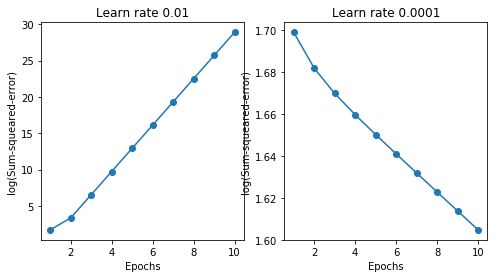

In [8]:
from adalineGD import AdalineGD
import matplotlib.pyplot as plt
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(8,4))
ada1 = AdalineGD(n_iter=10, eta=0.01).fit(x,y)
ax[0].plot(range(1,len(ada1.cost_) + 1),np.log10(ada1.cost_),marker='o')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('log(Sum-squeared-error)')
ax[0].set_title('Learn rate 0.01')

ada2 = AdalineGD(n_iter=10, eta=0.0001).fit(x,y)
ax[1].plot(range(1,len(ada2.cost_) + 1),np.log10(ada2.cost_),marker='o')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('log(Sum-squeared-error)')
ax[1].set_title('Learn rate 0.0001')
           
plt.show()

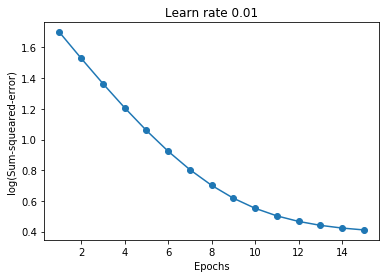

In [14]:
# 做一个标准化处理 各特征值的均值为0，标准差为1
x_std = np.copy(x)
x_std[:,0] = (x[:,0] - x[:,0].mean()) / x[:,0].std()
x_std[:,1] = (x[:,1] - x[:,1].mean()) / x[:,1].std()

ada1 = AdalineGD(n_iter=15, eta=0.01).fit(x_std,y)
plt.plot(range(1,len(ada1.cost_) + 1),np.log10(ada1.cost_),marker='o')
plt.xlabel('Epochs')
plt.ylabel('log(Sum-squeared-error)')
plt.title('Learn rate 0.01')
plt.show()